In [1]:
from pennylane_functions import loss_function, func_and_deriv
from pennylane import numpy as np
import pennylane as qml
import time
import matplotlib.pyplot as plt


In [6]:
#Set seed:
RANDOM_STATE = 42
seed = np.random.seed(RANDOM_STATE)

epochs = 10
num_qubits = 2
x = np.linspace(0,0.9,20)
l = 2

In [7]:
def training(epochs):
    losses = []
    theta = np.array(2*np.pi*np.random.random(num_qubits*l*3), requires_grad=True)
    for i in range(epochs):
        print("epoch number = ", i)
        loss = loss_function(x,num_qubits,theta, l)
        print("Current loss:", loss)
        losses.append(loss)
        optimizer = qml.AdamOptimizer()
        start = time.time()
        theta, cost_val = optimizer.step_and_cost(lambda theta: loss_function(x,num_qubits,theta, l), theta)
        end = time.time()
        print("Finished optimizing.")
        print()

    return theta, losses

In [8]:
theta_opt, losses = training(epochs)

#Plot the results
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss over iterations")
plt.show()

f, df = func_and_deriv(x, num_qubits, theta_opt, l)

plt.plot(x, f, label="f")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

epoch number =  0
Current loss: 441.4708504519987

Starting optimizer now!
Finished optimizing.
Costs  3.4378676414489746 seconds.
epoch number =  1
Current loss: 414.2884307891452

Starting optimizer now!
Finished optimizing.
Costs  2.336566209793091 seconds.
epoch number =  2
Current loss: 387.41559704374976

Starting optimizer now!
Finished optimizing.
Costs  3.280202627182007 seconds.
epoch number =  3
Current loss: 360.92804696864073

Starting optimizer now!
Finished optimizing.
Costs  2.936615467071533 seconds.
epoch number =  4
Current loss: 334.9012429465041

Starting optimizer now!
Finished optimizing.
Costs  2.7754974365234375 seconds.
epoch number =  5
Current loss: 309.41006290428993

Starting optimizer now!
Finished optimizing.
Costs  2.718468189239502 seconds.
epoch number =  6
Current loss: 284.52844696481986

Starting optimizer now!
Finished optimizing.
Costs  2.089907646179199 seconds.
epoch number =  7
Current loss: 260.32904190594354

Starting optimizer now!
Finished

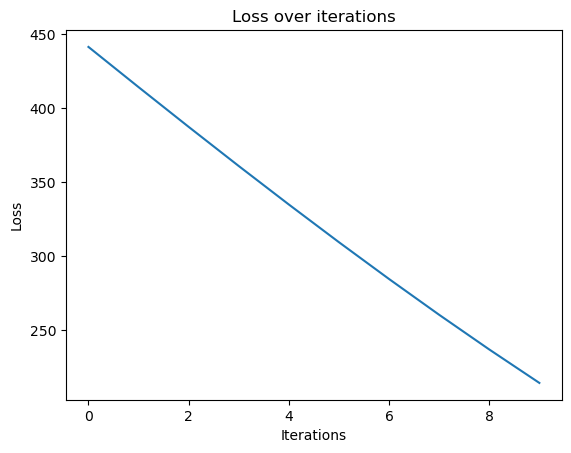

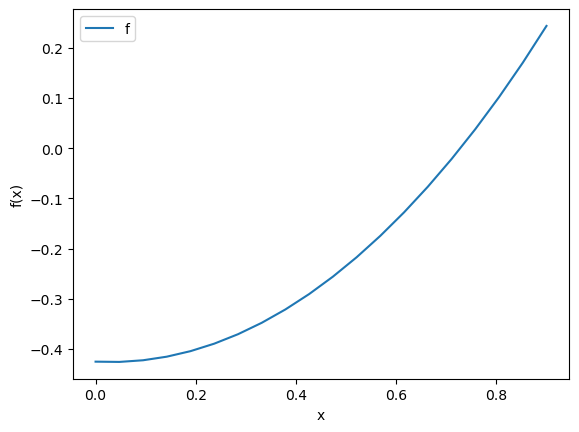